# MAC0317/MAC5920
## Introdução ao Processamento de Sinais Digitais
### Seção 2.4: A DFT unidimensional

In [3]:
import math as m
import io
from urllib.request import urlopen
import numpy as np
import scipy.io.wavfile as wavfile
import soundfile as sf
import matplotlib.pyplot as plt
import IPython.display as ipd

## Seção 2.4.1 Definição da DFT

No exemplo (1.23) vimos que um vetor $x\in\mathbb{C}^N$ pode ser escrito na base das exponenciais complexas $\{E_k|k=0,\ldots,N-1\}$ como $x=\displaystyle\sum_{k=0}^{N-1}c_kE_k$ onde $$c_k=\frac{(x,E_k)}{(E_k,E_k)}=\frac{1}{N}(x,E_k).$$

### Definição 2.1

A DFT de um vetor $x\in\mathbb{C}^N$ qualquer é o vetor  $X=DFT(x)\in\mathbb{C}^N$ cujas componentes são $$X_k = (x,E_k) = \sum_{n=0}^{N-1}x_ne^{-i2\pi k\frac{n}{N}},\ k=0,\ldots,N-1.$$

Observe que $X_k = Nc_k$ na definição da DFT: isso significa que, normalmente, ao computar a DFT por uma função de biblioteca, por exemplo $\texttt{numpy.fft.fft(x)}$, os coeficientes $X_k$ são $N$ vezes maiores do que os pesos $c_k$ associados às componentes $E_k$ na combinação linear $x=\displaystyle\sum_{k=0}^{N-1}c_kE_k$.

### Observação 2.1

O coeficiente $c_0 = \frac{X_0}{N}$ mede a contribuição da forma de onda constante $E_0=(1,1,\ldots,1)$. Em outras palavras, $$c_0 = \frac{X_0}{N} = \frac{1}{N}\sum_{n=0}^{N-1}x_n,$$ ou seja, $c_0$ é o valor médio do sinal $x$, também chamado de componente dc (*direct current*).

### Observação 2.2
Na expressão da definição 2.4.1, o vetor $X$ pode ser indexado em qualquer componente $k$, mesmo fora do intervalo $0\le k<N$, e sua expressão é periódica em $k$ com período $N$:
$$X_{N+k} = \sum_{n=0}^{N-1}x_ne^{-i2\pi(N+k)\frac{n}{N}} = \sum_{n=0}^{N-1}x_n\overbrace{e^{-i2\pi n}}^{=1}e^{-i2\pi k\frac{n}{N}} = X_k,\ \forall k\in\mathbb{Z}.$$
Frequentemente visualizamos as componentes $X_k$ no intervalo $-\frac{N}{2}<k\le +\frac{N}{2}$, que correspondem às frequências que respeitam a condição de Shannon-Nyquist (frequências que não produzem rebatimento).

### Definição 2.2

A IDFT de um vetor $X\in\mathbb{C}^N$ qualquer é o vetor  $x=IDFT(X)\in\mathbb{C}^N$ dado pela expressão $$x=\frac{1}{N}\sum_{k=0}^{N-1}X_kE_k,$$ de tal forma que suas componentes podem ser escritas como $$x_n = \frac{1}{N}\sum_{k=0}^{N-1}X_ke^{i2\pi k\frac{n}{N}} = \frac{1}{N}(X,\overline{E_n}),\ n=0,\ldots,N-1.$$

**Observação:** Existem textos e softwares que podem definir o par DFT/IDFT de maneira diferente. Poderíamos ter definido o par DFT/IDFT pelas equações $c_k=\displaystyle\frac{1}{N}\sum_{n=0}^{N-1}x_ne^{-i2\pi k\frac{n}{N}}$ e $x=\displaystyle\sum_{k=0}^{N-1}c_kE_k$, onde a constante $\frac{1}{N}$ apareceria na DFT ao invés de na IDFT, como é mais comum.

Também seria possível definir a DFT/IDFT com a mesma constante nas duas fórmulas:
$$\tilde{X}_k = \frac{1}{\sqrt{N}}(x,E_k)$$
e
$$x = \frac{1}{\sqrt{N}}\sum_{k=0}^{N-1}\tilde{X}_kE_k.$$
Essa versão corresponde a usar a base ortonormal das exponenciais complexas $\left\{\frac{E_k}{\|E_k\|}\mid k=0,\ldots,N-1\right\}$.

Em qualquer caso, as definições da DFT e da IDFT devem ser "compatíveis", ou seja, precisam satisfazer $$IDFT(DFT(x))=x,\ \forall x.$$

### Exemplo de sinal com rebatimento (aliasing)

Vamos considerar outra vez o sinal da seção 2.3
$$x(t)=2\cos(2\pi 5t)+0.8\sin(2\pi 12 t)+0.3\cos(2\pi 47t)$$
amostrado no intervalo $t\in[0,1)$ usando duas taxas de amostragem diferentes: $N=128$ e $N=64$.

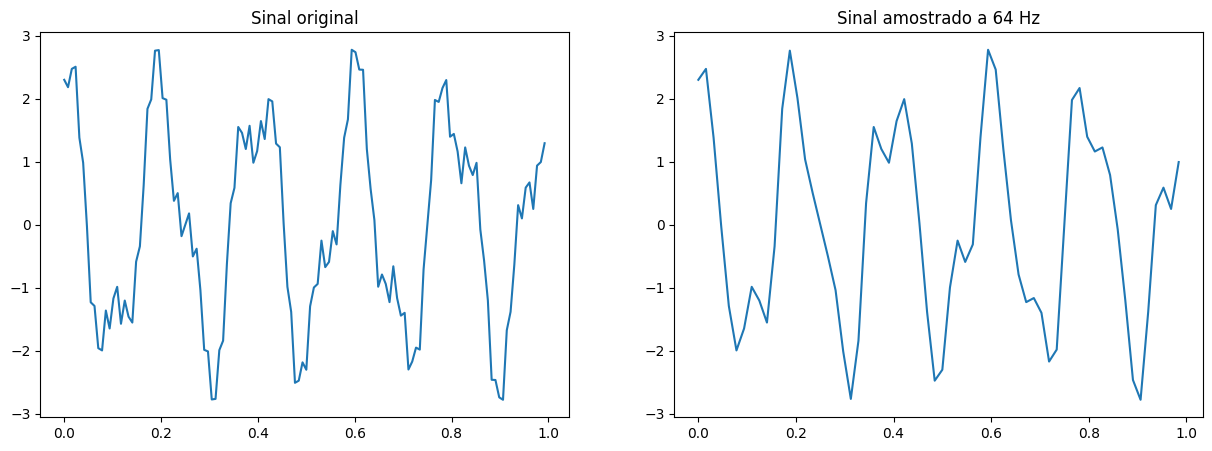

In [4]:
N = 128;
t = np.arange(0, 1, 1/N); 

N2 = N/2; 
t_sub = np.arange(0, 1, 1/N2)

x = 2*np.cos(2* m.pi *5*t) + 0.8*np.sin(2*m.pi*12*t) + 0.3*np.cos(2*m.pi*47*t)
x_sub = 2*np.cos(2* m.pi *5*t_sub) + 0.8*np.sin(2*m.pi*12*t_sub) + 0.3*np.cos(2*m.pi*47*t_sub)

f, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].set_title("Sinal original");ax[0].plot(t,x)
ax[1].plot(t_sub,x_sub); ax[1].set_title("Sinal amostrado a 64 Hz")

plt.show()

### Espectro de energia das duas versões do sinal

Lembrando da expressão $\|x\|^2 = \displaystyle\sum_{k=0}^{N-1}N|c_k|^2$, e do fato de que as duas componentes $E_k$ e $E_{-k}$ juntas representam uma componente real (seno ou cosseno), vamos usar como medida de energia os valores
$$N(|c_{-k}|^2+|c_k|^2),$$
ou equivalentemente, lembrando que $c_k=\frac{X_k}{N}$,
$$\frac{|X_{-k}|^2+|X_k|^2}{N}.$$

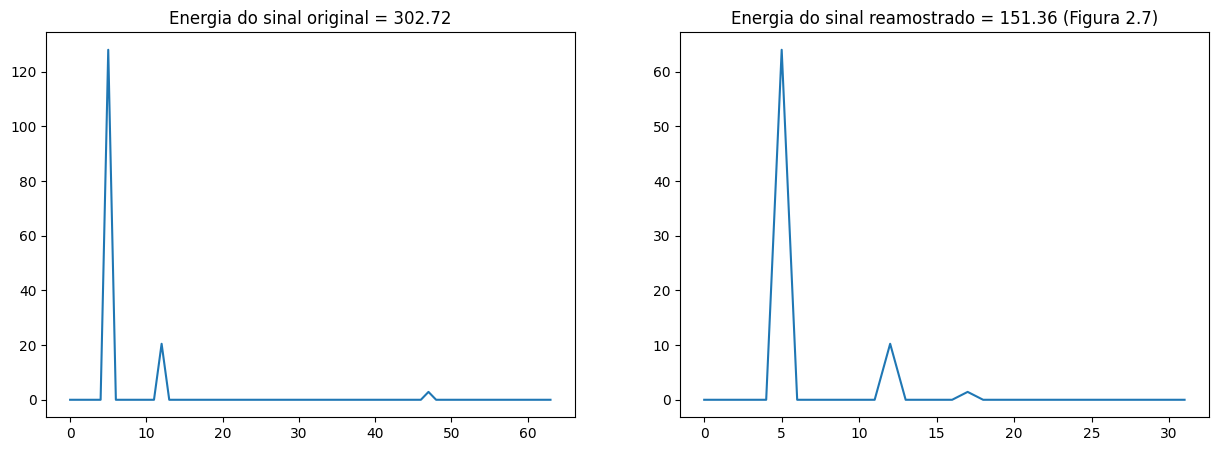

Componente de 47 Hz rebatida = 17.0 Hz


In [6]:
X= np.fft.fft(x);
c = X / (N);
E = N * abs(c)**2

X_sub = np.fft.fft(x_sub);
c_sub = X_sub / (N/2);
E_sub = (N/2) * abs(c_sub)**2

f, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(E[0:int(N/2)]);
ax[0].set_title(f"Energia do sinal original = {np.sum(E):.2f}");
ax[1].plot(E_sub[0:int(N/4)]);
ax[1].set_title(f"Energia do sinal reamostrado = {np.sum(E_sub):.2f} (Figura 2.7)");
plt.show(); 
f = 47; 
print("Componente de {0} Hz rebatida = {1} Hz".format(f,f%N2 if f%N2<=N2/2 else N2-f%N2))

Nesse exemplo o rebatimento da componente 47 Hz em uma componente de 17 Hz ocorre pois, usando uma taxa de amostragem de 64 Hz,
$$\begin{array}{ll}
\cos\left(2\pi 47\frac{n}{64}\right) 
& = \cos\left(2\pi 47\frac{n}{64} - 2\pi n\frac{64}{64}\right)\\
& = \cos\left(2\pi(47-64)\frac{n}{64}\right)\\
& = \cos\left(2\pi(-17)\frac{n}{64}\right)\\
& = \cos\left(2\pi 17\frac{n}{64}\right),\ \forall n\in\mathbb{Z},
\end{array}$$
ou seja, as componentes de 47 Hz e de 17 Hz são indistinguíveis nessa taxa de amostragem.

### Exemplo com pulsos quadrados (Figuras 2.8 - 2.10)

Considere um pulso quadrado de largura $R$ e duração $N$, ou seja, um sinal $x\in\mathbb{R}^N$ tal que
$$x_n = \left\{\begin{array}{ll}
1&n<R\\
0&n\ge R,
\end{array}\right.$$
cuja DFT é (exercício 2.11 resolvido):
$$X_k = \sum_{n=0}^{N-1}x_ne^{-i2\pi k\frac{n}{N}} = \sum_{n=0}^{R-1}(\overbrace{e^{-i2\pi k\frac{1}{N}}}^z)^n = \frac{1-z^R}{1-z} = \frac{1-e^{-i2\pi k\frac{R}{N}}}{1-e^{-i2\pi k\frac{1}{N}}}.$$

Cada componente $X_k = \frac{1-e^{-i2\pi k\frac{R}{N}}}{1-e^{-i2\pi k\frac{1}{N}}}$ possui energia
$$\begin{array}{ll}
|X_k|^2
& = \frac{|1-e^{-i2\pi k\frac{R}{N}}|^2}{|1-e^{-i2\pi k\frac{1}{N}}|^2}
= \frac{\left(1-\cos\left(2\pi k\frac{R}{N}\right)\right)^2+\left(\sin\left(2\pi k\frac{R}{N}\right)\right)^2}{\left(1-\cos\left(2\pi k\frac{1}{N}\right)\right)^2+\left(\sin\left(2\pi k\frac{1}{N}\right)\right)^2}\\
& = \frac{1-2\cos\left(2\pi k\frac{R}{N}\right)+\left(\cos\left(2\pi k\frac{R}{N}\right)\right)^2+\left(\sin\left(2\pi k\frac{R}{N}\right)\right)^2}{1-2\cos\left(2\pi k\frac{1}{N}\right)+\left(\cos\left(2\pi k\frac{1}{N}\right)\right)^2+\left(\sin\left(2\pi k\frac{1}{N}\right)\right)^2}\\
& = \frac{2-2\cos\left(2\pi k\frac{R}{N}\right)}{2-2\cos\left(2\pi k\frac{1}{N}\right)}\\
& = \frac{1-\cos\left(2\pi k\frac{R}{N}\right)}{1-\cos\left(2\pi k\frac{1}{N}\right)}.
\end{array}$$

In [16]:
def pulso(R,title):
    N = 256; 
    t = np.arange(N);
    f, ax = plt.subplots(len(R),2,figsize=(15,10)); 
    f.subplots_adjust(hspace=0.35)
    for i in range(len(R)):
        r = R[i]; 
        x = np.zeros(N); 
        x[0:r:1] = 1;
        X = np.fft.fft(x); 
        c = X / N; 
        E = N * abs(c)**2
        ax[i,0].set_title(f"Pulso Quadrado com R = {r}, com Energia={(np.linalg.norm(x)**2):.2f}"); 
        ax[i,0].plot(x)
        ax[i,1].set_title(f"FFT do pulso quadrado com R = {r}, com Energia={np.sum(E):.2f}"); 
        ax[i,1].plot(np.arange(N) - N/2, np.roll(E, int(N/2)))
        f.suptitle(title)

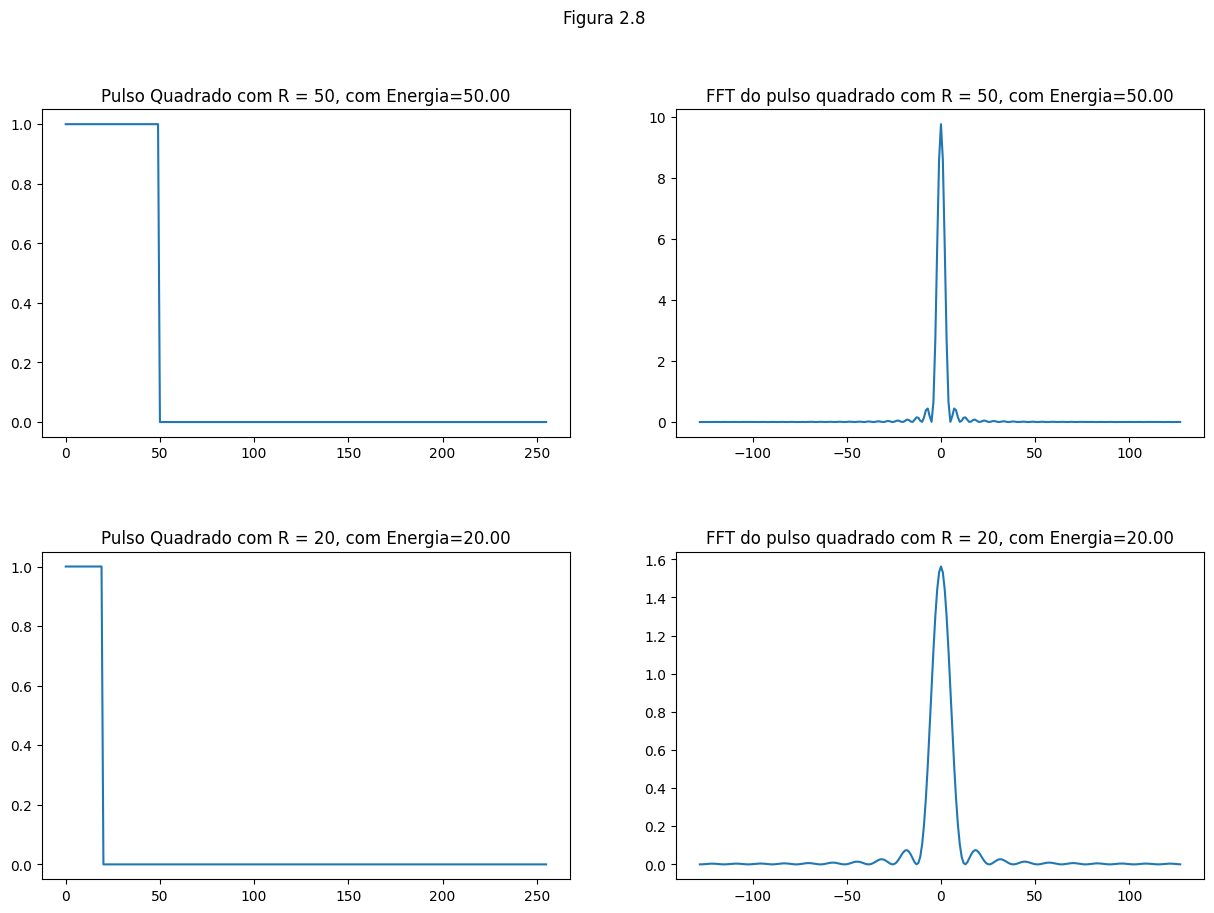

In [17]:
pulso([50,20],"Figura 2.8")

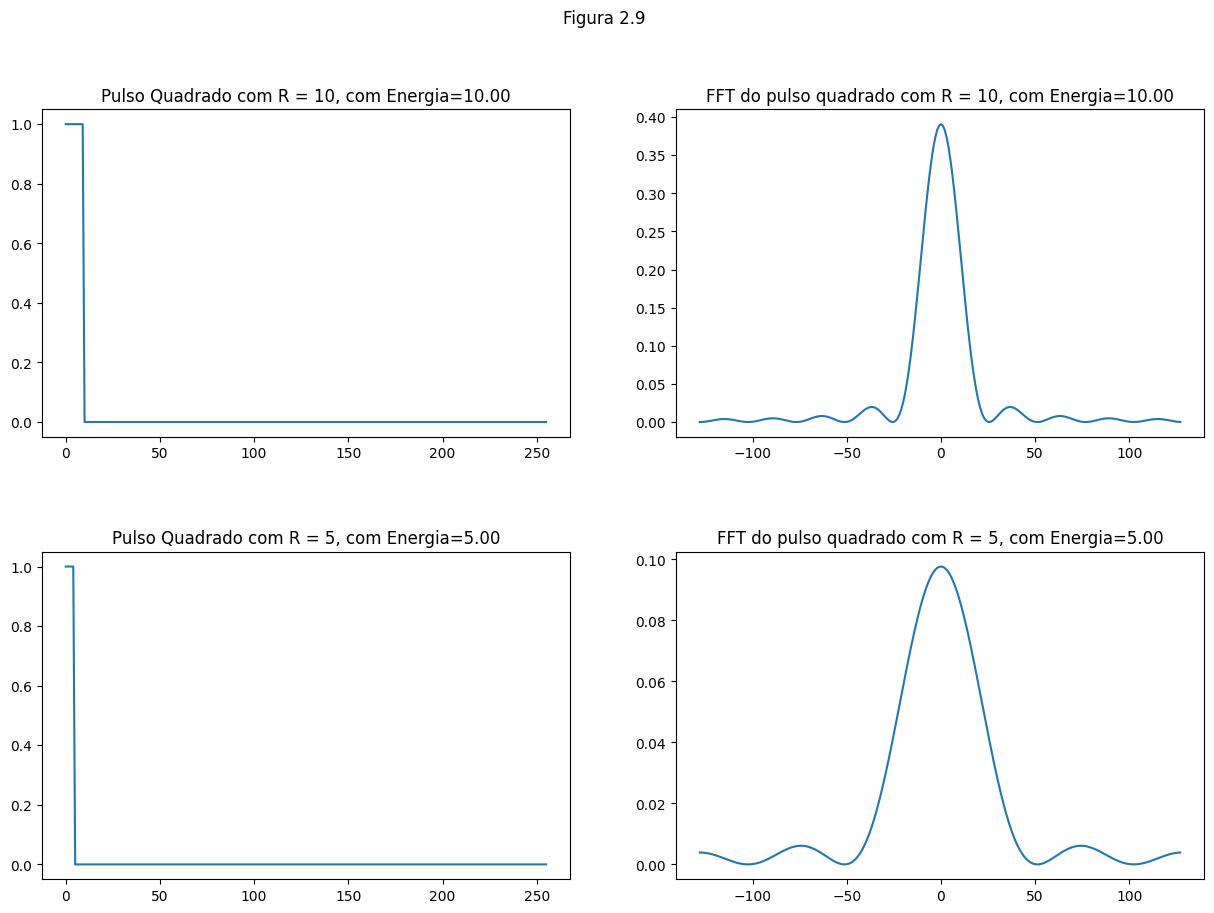

In [18]:
pulso([10,5],"Figura 2.9")

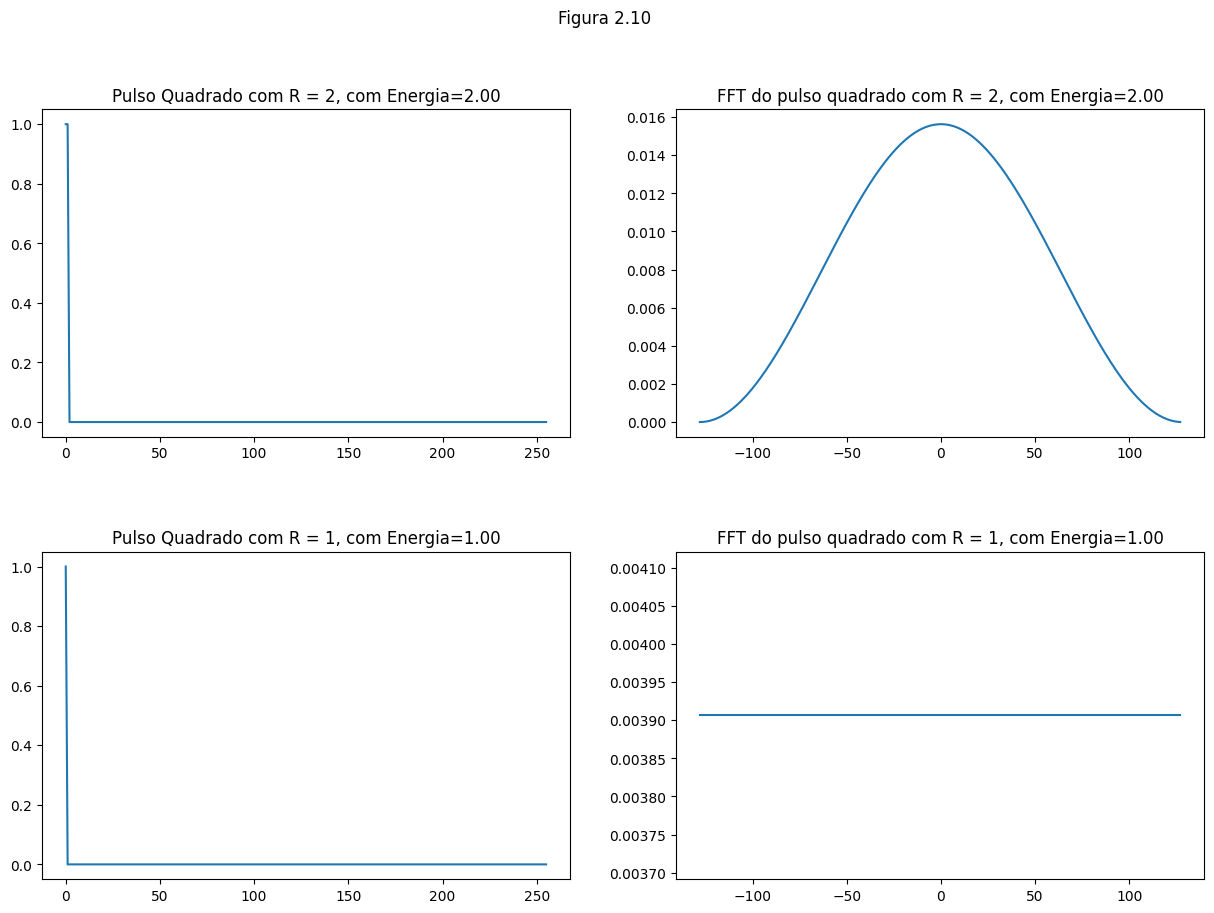

In [19]:
pulso([2,1],"Figura 2.10")

### Exemplo de sinal aleatório e sua DFT (Figura 2.11)

Considere $x\in\mathbb{R}^N$ obtido por $N$ sorteios aleatórios de uma mesma distribuição normal, ou seja,
$$x_n = \mathcal{N}(0,\sigma^2),$$
onde $\mu=0$ é a média e $\sigma^2$ é a variância da distribuição normal.

É possível provar (exercício 2.12) que as componentes de Fourier $X_k$, sendo elas próprias combinações lineares das amostras aleatórias $x_n$, também possuem distribuição normal, sendo 
$$X_0 = \mathcal{N}(0,N\sigma^2)$$
e
$$X_k = \mathcal{N}\left(0,\frac{N}{2}\sigma^2\right).$$

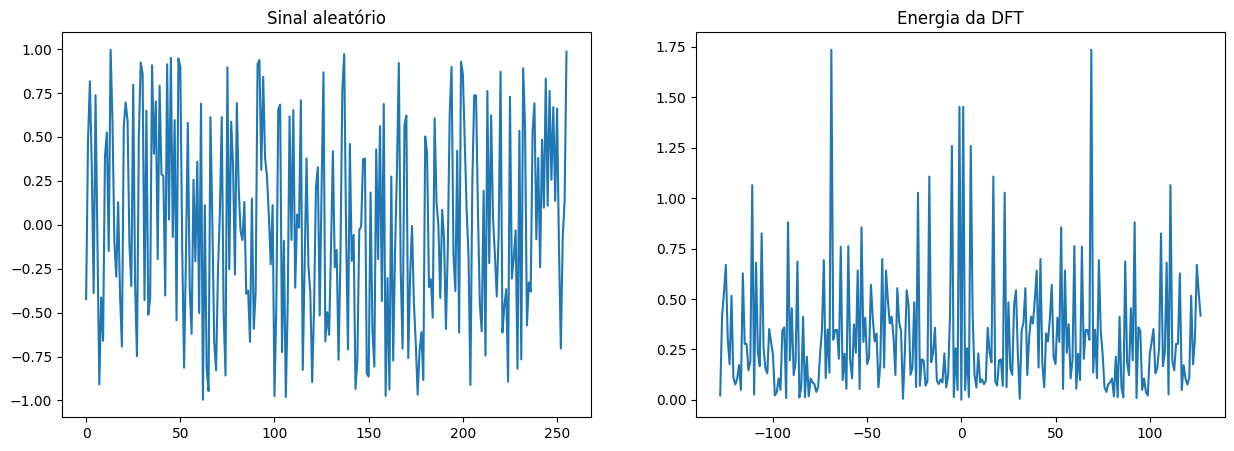

In [20]:
N = 256; t = np.arange(N); x = np.random.rand(N) * 2 - 1
X = np.fft.fft(x); c = X / N; E = N * abs(c)**2
f, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].set_title("Sinal aleatório"); ax[0].plot(t, x)
ax[1].set_title("Energia da DFT"); ax[1].plot(np.arange(N) - N/2, np.roll(E, int(N/2))); plt.show()

### Sugestões para plotar DFTs

- É usual plotarmos $|X_k|$ (magnitude) ou $|X_k|^2$ (energia), ou ainda alguma versão com mudança de escala ($|c_k|=|X_k|/N$ ou $N|c_k|^2 = |X_k|^2/N$). Apenas em aplicações específicas estaremos interessados no espectro de fase ($\measuredangle X_k$).

- Quando os valores de $X_k$ variam em uma faixa muito grande de valores, ou quando são muito baixos, é comum plotarmos espectros em escala logarítmica ($\log|X_k|$, ou $\log(1+|X_k|)$ para evitarmos $\log 0 = -\infty$).

- Escolha a faixa de frequências mais conveniente para o que se quer ilustrar. Frequentemente estaremos interessados em combinar as componentes $-k$ e $k$ para observar energias associadas a componentes reais (senos/cossenos), através de expressões como $(|X_{-k}|^2+|X_k|^2)/N$, para $k=1,\ldots,\frac{N}{2}-1$ (observe que as componentes $k=0$ e $k=\frac{N}{2}$ devem ser consideradas separadamente).

### Observação 2.3: Índices da DFT e Frequências em Hz

Os índices $k$ das componentes $X_k$ da DFT de um sinal $x\in\mathbb{C}^N$ representam frequências medidas em **número de ciclos completos no intervalo $[0,N)$**. Para traduzirmos esses índices em frequências em Hz, precisamos considerar **quantos segundos** dura o sinal $x$, através da expressão $T = \frac{N}{R}$. Uma componente que percorre $k$ ciclos em $N$ amostras percorrerá $k$ ciclos em $T$ segundos, o que corresponde a uma frequência de $\frac{k}{T} = \frac{kR}{N}$ Hz.

Observe que os índices $k=0,1,\ldots,\frac{N}{2}$ corresponderão dessa forma às frequências
$$\frac{0R}{N}=0,\frac{1R}{N}=\frac{R}{N},\ldots,\frac{NR}{2N}=\frac{R}{2}\quad\mbox{Hz}.$$
Os índices $k=\frac{N}{2}+1,\ldots,N-1$, que equivalem (por rebatimento) aos índices $k=-\frac{N}{2}+1,\ldots,-1$, correspondem às frequências
$$\frac{(-N/2+1)R}{N}=-\frac{R}{2}+\frac{R}{N},\ldots,\frac{-1R}{N}=-\frac{R}{N}\quad\mbox{Hz}.$$

### Exemplo de áudio: Sinal de sino e sua DFT (Figura 2.12)

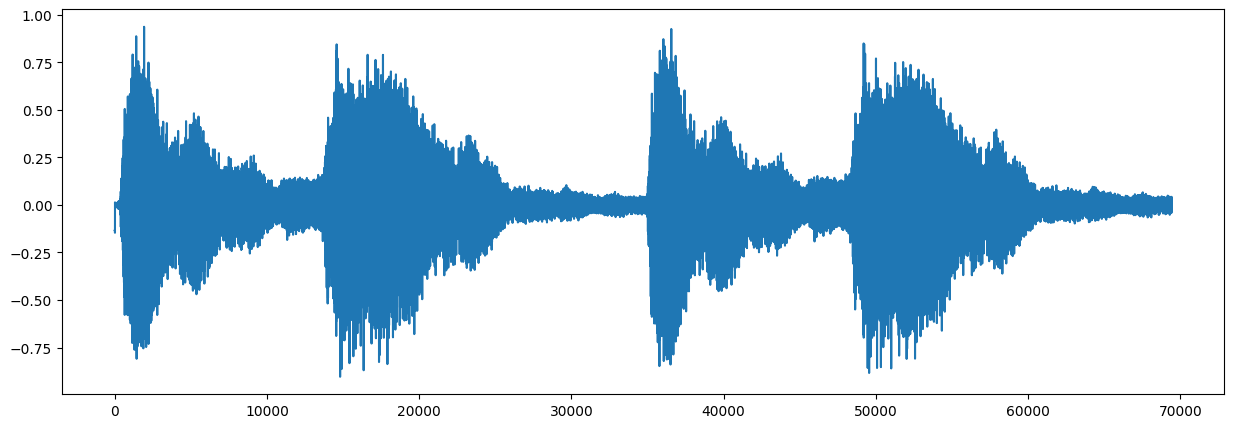

In [21]:
url="https://www.ime.usp.br/~mqz/bells004.wav" # abre arquivo wav de url:
x, rate = sf.read(io.BytesIO(urlopen(url).read()))
x_mono = x[:,0] + x[:,1] # converte sinal estereo para mono
x_mono = x_mono-np.mean(x_mono,0) # corrige média do sinal
plt.figure(figsize=(15,5));
plt.plot(x_mono);
plt.show()
ipd.Audio(x.T, rate=rate)

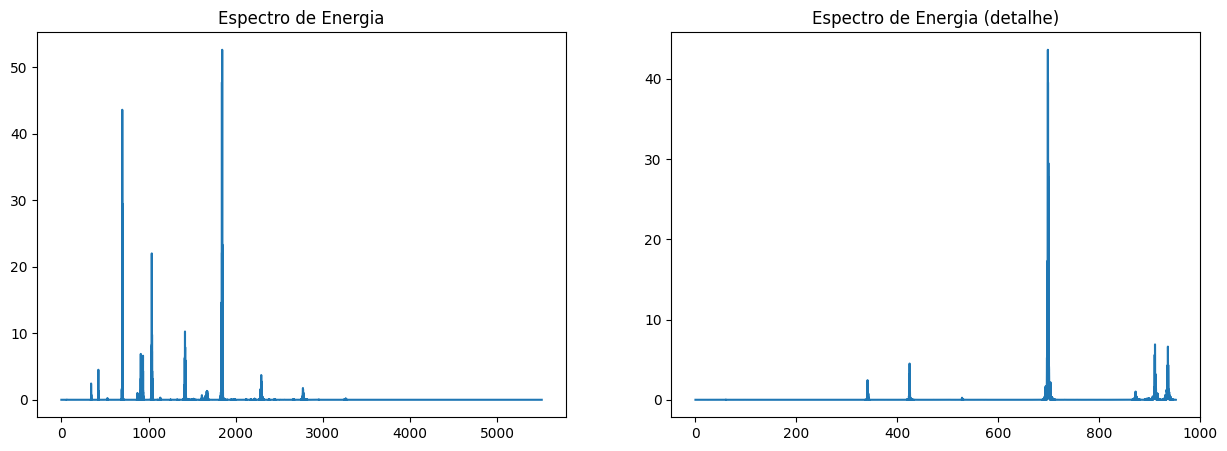

In [24]:
X = np.fft.fft(x_mono);
N = len(x);
E = 2*abs(X[0:int(N/2):1])**2/N
f, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].set_title("Espectro de Energia"); 
ax[0].plot(np.arange(N/2) *rate/N, E)

ax[1].set_title("Espectro de Energia (detalhe)"); 
ax[1].plot(np.arange(6000) *rate/N, E[0:6000:1]); 
plt.show()

### Exemplo de remoção de componentes mais fracas

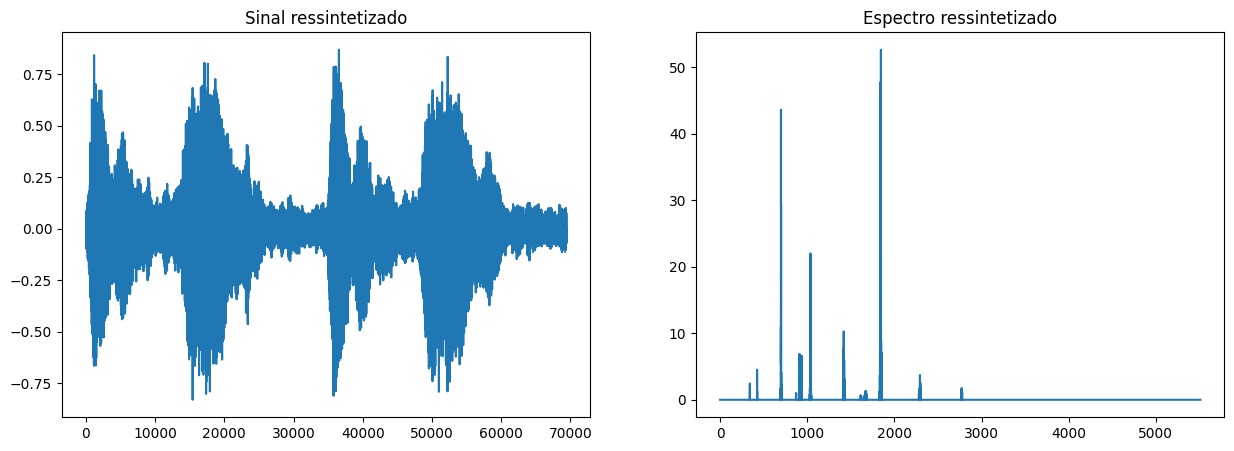

In [25]:
Y = X.copy();
C = 0.1 * abs(Y).max()
for val in np.nditer(Y, op_flags=['readwrite']):
    if abs(val) < C:
        val[...] = 0
rex = np.real(np.fft.ifft(Y)); 
EY = 2*abs(Y[0:int(N/2):1])**2/N
f, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].set_title("Sinal ressintetizado"); 
ax[0].plot(rex)
ax[1].set_title("Espectro ressintetizado"); 
ax[1].plot(np.arange(N/2) *rate/N, EY); plt.show()
ipd.Audio(rex, rate=rate)